In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']
print(data_file)


Cardiac_Outcomes.xlsx


# 1) tachypnea and bradypnea patients count?

In [72]:
Tachpnea = (lab_data['respiration']>20).sum()
print('Tachpnea Patients Count:',Tachpnea)
Bradypnea = (lab_data['respiration']<12).sum()
print('Bradypnea Patients Count:',Bradypnea)

Tachpnea Patients Count: 240
Bradypnea Patients Count: 1


# 2) Dementia Male patients count? Average age for Dementia Male paient?

In [73]:
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
merged=pd.merge(Patient_data, Demography_data , on='inpatient_number')
Dementia_Male= ((merged['dementia']==1) & (merged['gender']=='Male')).sum()
print("Dementia male patients",Dementia_Male)
Male_count=merged[merged['gender']=='Male']
Average=Male_count['Age'].mean()
print('average age for Dementia male patient:',round(Average))

Dementia male patients 64
average age for Dementia male patient: 72


# 3) percentage of patients in cardiology to home?

In [74]:
Cardiology_Patients= (Hospital_data['admission_ward']=='Cardiology').sum()
Cardiology_Home = ((Hospital_data['DestinationDischarge']=='Home') & (Hospital_data['admission_ward']=='Cardiology' )).sum()
Percentage=Cardiology_Home/Cardiology_Patients*100
print('Percentage of Cardiology patients returned to home:',round(Percentage,2),'%')

Percentage of Cardiology patients returned to home: 71.17 %


# 4) Percentage of  Female Farmers?

In [75]:
female_farmers = ((Demography_data['occupation']=='farmer') & (Demography_data['gender']=='Female')).sum()
Total_Farmers=(Demography_data['occupation']=='farmer').sum()
Percentage=female_farmers/Total_Farmers*100
print('Female Farmers Percentage:',round(Percentage),'%')


Female Farmers Percentage: 57 %


# 5) what is the ratio between Thrombocytopenia Patients and Thrombocytosis Patients? 

In [76]:
Thrombocytopenia=(lab_data['platelet']<150).sum()
Thrombocytosis=(lab_data['platelet']>450).sum()
ratio=cytopenia/cytosis
print('ratio between Thrombocytopenia and Thrombocytosis Patients:',round(ratio))


ratio between Thrombocytopenia and Thrombocytosis Patients: 170


# 6) Find count of Liver Disease Patients with Hypofibrinogenemia and Liver Disease Patients with 'Hyperfibrinogenemia?

In [77]:
merged=pd.merge(Patient_data, lab_data , on='inpatient_number')
Liver_Patients=(merged['liver_disease']==1).sum()
print('liver patients ',Liver_Patients)
liver_Hyperfibrinogemia=((merged['liver_disease']==1) & (merged['fibrinogen']>4)).sum()
print('liver patients with Hyperfibrinogemia ',liver_Hyperfibrinogemia)
liver_Hypofibrinogemia=((merged['liver_disease']==1) & (merged['fibrinogen']<1)).sum()
print('liver patients with Hypofibrinogemia ',liver_Hypofibrinogemia)

liver patients  84
liver patients with Hyperfibrinogemia  8
liver patients with Hypofibrinogemia  2


# 7) Create BarChart with Gender and Diabetes?

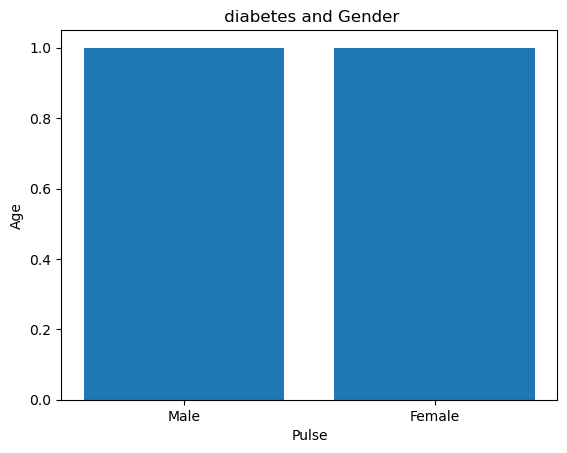

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
merged=pd.merge(Patient_data,Demography_data, on='inpatient_number')
#concated=pd.concat([lab_data,Demography_data],axis=1)
bars = plt.bar(merged['gender'],merged ['diabetes'])
#sns.violinplot(x='gender',y='pulse',data=merged)
plt.xlabel("Pulse")
plt.ylabel("Age")
plt.title(" diabetes and Gender")
plt.show()

# 8) Find the Correlation between Pulse and Temperature?

In [79]:
correlation =lab_data['pulse'].corr(lab_data['body_temperature'])
print('Correlation Between Pulse and Temprature',round(correlation,2))

Correlation Between Pulse and Temprature 0.09
